🌟 Exercise 1: Duplicate Detection and Removal
Instructions
Objective: Identify and remove duplicate entries in the Titanic dataset.

Load the Titanic dataset.
Identify if there are any duplicate rows based on all columns.
Remove any duplicate rows found in the dataset.
Verify the removal of duplicates by checking the number of rows before and after the duplicate removal.
Hint: Use the duplicated() and drop_duplicates() functions in Pandas.

In [22]:
import pandas as pd
# !unzip 'titanic dataset.zip'

td = pd.read_csv('/content/titanic dataset/train.csv')
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
td.drop_duplicates
td.duplicated().sum()

0

Exercise 2: Handling Missing Values
Instructions
Identify columns in the Titanic dataset with missing values.
Explore different strategies for handling missing data, such as removal, imputation, and filling with a constant value.
Apply each strategy to different columns based on the nature of the data.
Hint: Review methods like dropna(), fillna(), and SimpleImputer from scikit-learn.



In [19]:
miss_d = td.isna()
print(miss_d.head())

miss_d_s = miss_d.sum()
print(miss_d_s)

   PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   
3        False     False   False  False  False  False  False  False   False   
4        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False  False     False  
1  False  False     False  
2  False  False     False  
3  False  False     False  
4  False  False     False  
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [14]:
td['Cabin'].fillna('U', inplace=True)
print(td.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500     U        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250     U        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500     U        S  


<ipython-input-14-3664936a7614>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  td['Cabin'].fillna('U', inplace=True)


In [16]:
# Dropping useless field just cause I want to use impute on age
td.dropna(subset=['Embarked'], inplace=True)
print(td.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500     U        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250     U        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500     U        S  


In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
td['Age'] = imputer.fit_transform(td[['Age']])
print("\nDataFrame after imputing 'Age':")
print(td)



DataFrame after imputing 'Age':
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                              


🌟 Exercise 3: Feature Engineering
Instructions
Create new features, such as Family Size from SibSp and Parch, and Title extracted from the Name column.
Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding.
Normalize or standardize numerical features if required.
Hint: Utilize Pandas for data manipulation and scikit-learn’s preprocessing module for encoding.

In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
td['FamilySize'] = td['SibSp'] + td['Parch']
td['Title'] = td['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
label_encoder = LabelEncoder()
td['Title'] = label_encoder.fit_transform(td['Title'])
td['Sex'] = label_encoder.fit_transform(td['Sex'])

scaler = StandardScaler()
td[['Age', 'Fare']] = scaler.fit_transform(td[['Age', 'Fare']])
td.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log,Age_log,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.532809,1,0,A/5 21171,-0.872735,NaN,S,2.110213,3.135494,1,11
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.585553,1,0,PC 17599,1.943083,C85,C,4.199221,3.663562,1,12
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.253218,0,0,STON/O2. 3101282,-0.840181,NaN,S,2.188856,3.295837,0,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.375861,1,0,113803,1.338562,C123,S,3.990834,3.583519,1,12
4,5,0,3,"Allen, Mr. William Henry",1,0.375861,0,0,373450,-0.834152,NaN,S,2.202765,3.583519,0,11


🌟 Exercise 4: Outlier Detection and Handling
Instructions
Use statistical methods to detect outliers in columns like Fare and Age.
Decide on a strategy to handle the identified outliers, such as capping, transformation, or removal.
Implement the chosen strategy and assess its impact on the dataset.
Hint: Explore methods like IQR (Interquartile Range) and Z-score for outlier detection.

In [23]:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower_bound, upper_bound)
    return data

td = cap_outliers(td, 'Fare')
td = cap_outliers(td, 'Age')


In [24]:
import numpy as np

td['Fare_log'] = np.log1p(td['Fare'])  # Log-transform 'Fare'
td['Age_log'] = np.log1p(td['Age'])

def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

td = remove_outliers(td, 'Fare')
td = remove_outliers(td, 'Age')

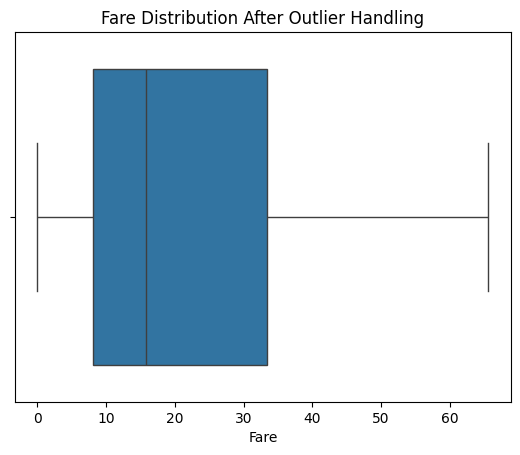

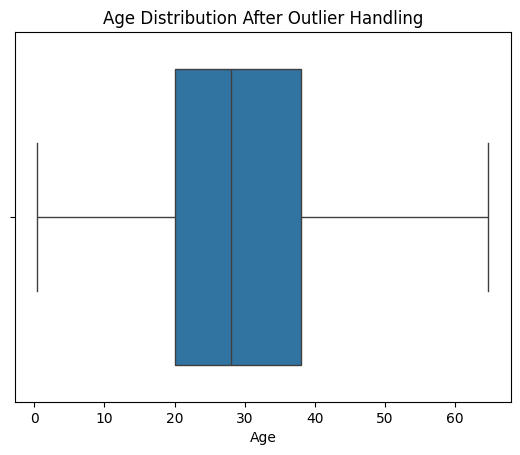

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=td['Fare'])
plt.title("Fare Distribution After Outlier Handling")
plt.show()

sns.boxplot(x=td['Age'])
plt.title("Age Distribution After Outlier Handling")
plt.show()

In [26]:
print(td[['Fare', 'Age']].describe())


             Fare         Age
count  714.000000  714.000000
mean    25.345675   29.622700
std     20.748973   14.316665
min      0.000000    0.420000
25%      8.050000   20.125000
50%     15.741700   28.000000
75%     33.375000   38.000000
max     65.634400   64.812500


 Exercise 5: Data Standardization and Normalization
Instructions
Assess the scale and distribution of numerical columns in the dataset.
Apply standardization to features with a wide range of values.
Normalize data that requires a bounded range, like [0, 1].
Hint: Consider using StandardScaler and MinMaxScaler from scikit-learn’s preprocessing module.



                Age          Fare  FamilySize
count  7.140000e+02  7.140000e+02  714.000000
mean   1.393221e-16  1.243947e-16    0.943978
std    1.000701e+00  1.000701e+00    1.483788
min   -2.041200e+00 -1.222395e+00    0.000000
25%   -6.638667e-01 -8.341521e-01    0.000000
50%   -1.134229e-01 -4.631895e-01    0.000000
75%    5.855535e-01  3.872459e-01    1.000000
max    2.459684e+00  1.943083e+00    7.000000


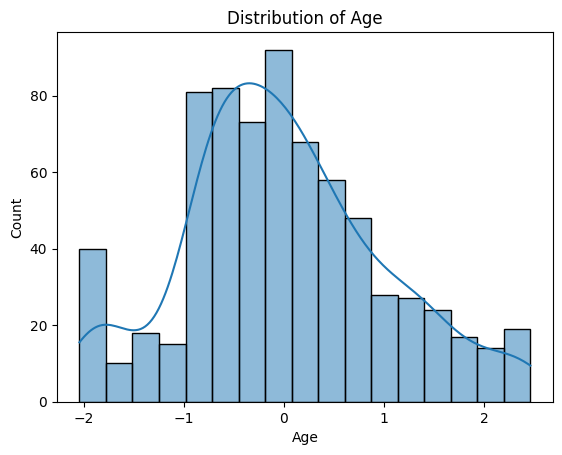

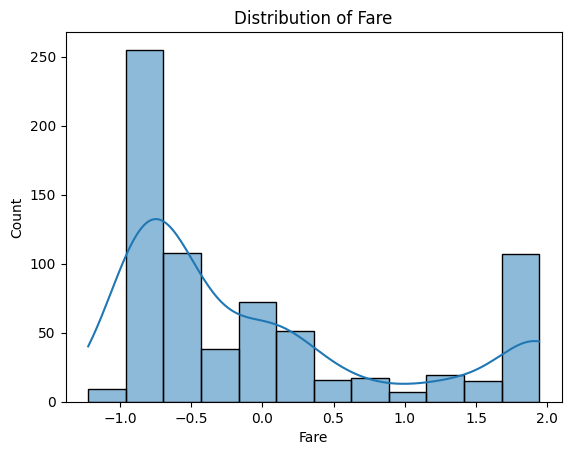

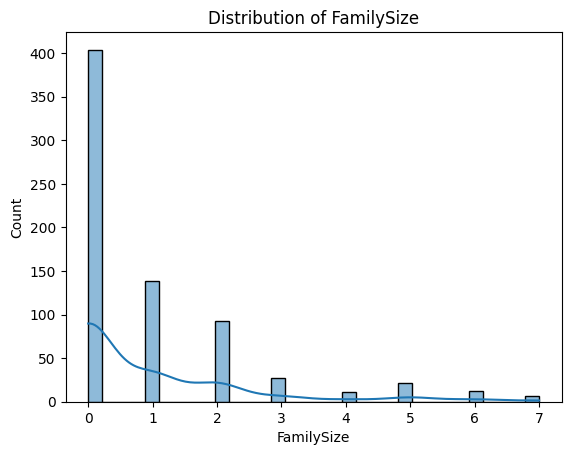

In [34]:
print(td[['Age', 'Fare', 'FamilySize']].describe())


sns.histplot(td['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

sns.histplot(td['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

sns.histplot(td['FamilySize'], kde=True)
plt.title('Distribution of FamilySize')
plt.show()


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
td[['Fare', 'Age']] = scaler.fit_transform(td[['Fare', 'Age']])
print(td[['Fare', 'Age']].describe())


               Fare           Age
count  7.140000e+02  7.140000e+02
mean  -1.492737e-17 -9.951579e-18
std    1.000701e+00  1.000701e+00
min   -1.222395e+00 -2.041200e+00
25%   -8.341521e-01 -6.638667e-01
50%   -4.631895e-01 -1.134229e-01
75%    3.872459e-01  5.855535e-01
max    1.943083e+00  2.459684e+00


In [36]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
td[['FamilySize']] = min_max_scaler.fit_transform(td[['FamilySize']])
print(td[['FamilySize']].describe())


       FamilySize
count  714.000000
mean     0.134854
std      0.211970
min      0.000000
25%      0.000000
50%      0.000000
75%      0.142857
max      1.000000


                Age          Fare  FamilySize
count  7.140000e+02  7.140000e+02  714.000000
mean  -9.951579e-18 -1.492737e-17    0.134854
std    1.000701e+00  1.000701e+00    0.211970
min   -2.041200e+00 -1.222395e+00    0.000000
25%   -6.638667e-01 -8.341521e-01    0.000000
50%   -1.134229e-01 -4.631895e-01    0.000000
75%    5.855535e-01  3.872459e-01    0.142857
max    2.459684e+00  1.943083e+00    1.000000


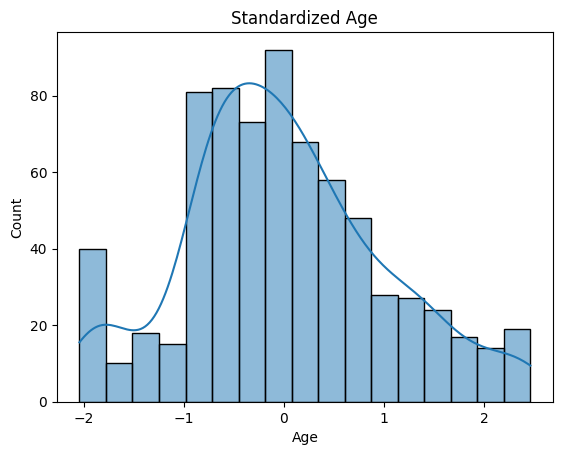

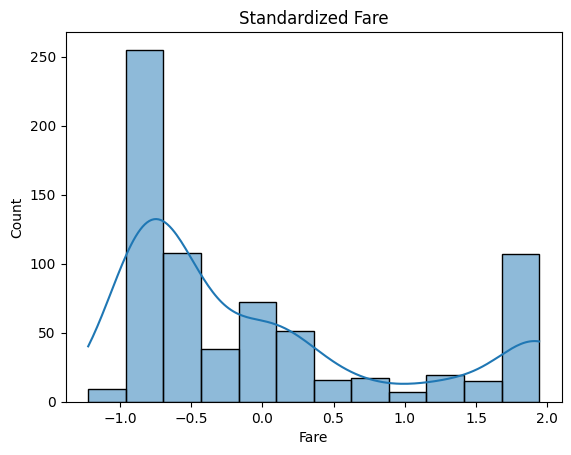

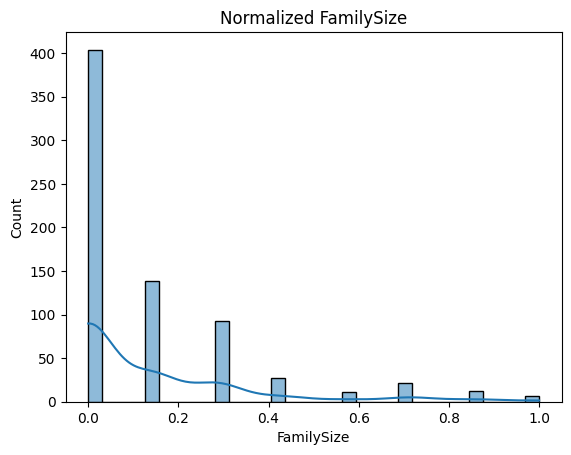

In [38]:
print(td[['Age', 'Fare', 'FamilySize']].describe())

sns.histplot(td['Age'], kde=True)
plt.title('Standardized Age')
plt.show()

sns.histplot(td['Fare'], kde=True)
plt.title('Standardized Fare')
plt.show()

sns.histplot(td['FamilySize'], kde=True)
plt.title('Normalized FamilySize')
plt.show()


Exercise 6: Feature Encoding
Instructions
Identify categorical columns in the Titanic dataset, such as Sex and Embarked.
Use one-hot encoding for nominal variables and label encoding for ordinal variables.
Integrate the encoded features back into the main dataset.
Hint: Utilize pandas.get_dummies() for one-hot encoding and LabelEncoder from scikit-learn for label encoding.

In [40]:
td = pd.get_dummies(td, columns=['Sex', 'Embarked'], drop_first=True)
print(td.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.532809      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.585553      1      0   
2                             Heikkinen, Miss. Laina -0.253218      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.375861      1      0   
4                           Allen, Mr. William Henry  0.375861      0      0   

             Ticket      Fare Cabin  Fare_log   Age_log  FamilySize  Title  \
0         A/5 21171 -0.872735   NaN  2.110213  3.135494    0.142857     11   
1          PC 17599  1.943083   C85  4.199221  3.663562    0.142857     12   
2  STON/O2. 3101282 -0.840181   NaN  2.188856  3.295837    0.000000 

In [43]:
label_encoder = LabelEncoder()
td['Pclass'] = label_encoder.fit_transform(td['Pclass'])
print(td[['Pclass']].head())


   Pclass
0       2
1       0
2       2
3       0
4       2


Exercise 7: Data Transformation for Age Feature
Instructions
Create age groups (bins) from the Age column to categorize passengers into different age categories.
Apply one-hot encoding to the age groups to convert them into binary features.
Hint: Use pd.cut() for binning the Age column and pd.get_dummies() for one-hot encoding.

In [45]:
age_bins = [0, 18, 35, 55, 100]
age_labels = ['0-18', '19-35', '36-55', '56+']
td['AgeGroup'] = pd.cut(td['Age'], bins=age_bins, labels=age_labels, right=False)
td = pd.get_dummies(td, columns=['AgeGroup'], drop_first=True)
print(td.head())


   PassengerId  Survived  Pclass  \
0            1         0       2   
1            2         1       0   
2            3         1       2   
3            4         1       0   
4            5         0       2   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.532809      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.585553      1      0   
2                             Heikkinen, Miss. Laina -0.253218      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.375861      1      0   
4                           Allen, Mr. William Henry  0.375861      0      0   

             Ticket      Fare Cabin  Fare_log   Age_log  FamilySize  Title  \
0         A/5 21171 -0.872735   NaN  2.110213  3.135494    0.142857     11   
1          PC 17599  1.943083   C85  4.199221  3.663562    0.142857     12   
2  STON/O2. 3101282 -0.840181   NaN  2.188856  3.295837    0.000000 